## Introduction to Plotting

### Pyhton Packages for plotting
- `matplotlib` : All plots in pandas are matplotlib objects
- `seaborn` : Focused on statistical visualization
- `bokeh` : To create interactive visualization for the internet
- `Plotly` : Create interactive and embedded visualization

### Matplotlib

Main submodule is `pyplot` which will give you different function to work with different plot elements.

### Creating a Plot

- Import the necessary packages
- Import or create the data
- Call the appropriate plotting functions

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Display the plots inside the notebook
%matplotlib inline

In [3]:
# Dummy Data

X = [1, 2, 3, 4, 5]
Y = [10, 20, 25, 30, 35]

print(X)
print(Y)

[1, 2, 3, 4, 5]
[10, 20, 25, 30, 35]


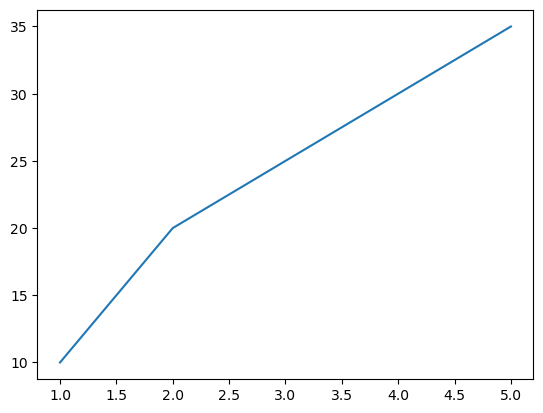

In [4]:
plt.plot(X,Y)
plt.show()

### Test Data

Get the data from: `icarus.cs.weber.edu/~hvalle/cs4580/data/plottingDemo01.zip`

In [8]:
# Load the data
hw_df = pd.read_csv('../data/plottingDemo01/hw.csv')

hw_df.head()

,Index,"Height(Inches)""","""Weight(Pounds)"""
0,1,65.78,112.99
1,2,71.52,136.49
2,3,69.40,153.03
3,4,68.22,142.34
4,5,67.79,144.30


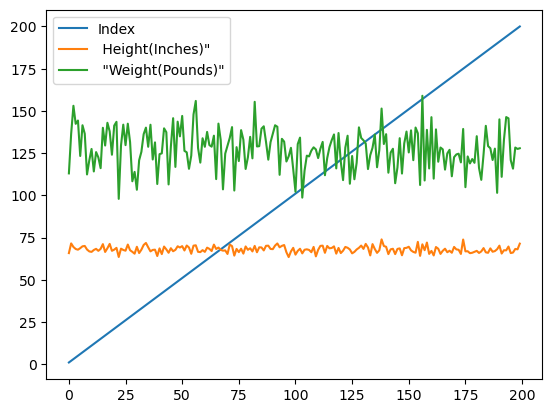

In [9]:
# Sample Plot
hw_df.plot()
plt.show()

## Common Plots
- Line
- Scatter
- Bar
- Histograms
- Area

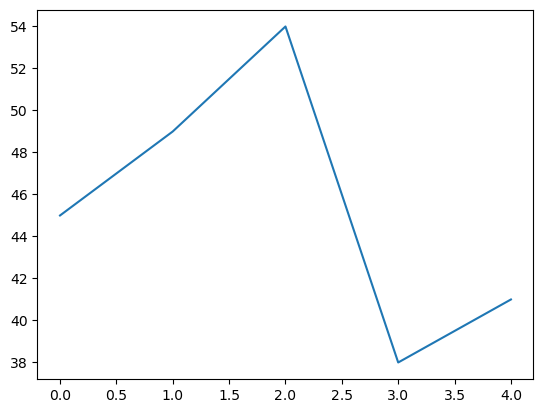

In [10]:
# Another Line Plot
y = [45, 49, 54, 38, 41]
plt.plot(y)
plt.show()